In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
df = pd.read_csv('/content/drive/MyDrive/SA-Hack1/training_set_features.csv')

In [87]:
df.head(1000)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,bhuqouqj,Non-MSA,1.0,0.0,arjwrbjb,dlvbwzss
996,996,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"> $75,000",Not Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",1.0,0.0,vjjrobsf,rcertsgn
997,997,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,Not Married,Rent,Not in Labor Force,lzgpxyit,"MSA, Principle City",0.0,0.0,NaN,NaN
998,998,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,Not Married,Rent,Not in Labor Force,mlyzmhmf,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [88]:
df.shape

(26707, 36)

In [89]:
lb = pd.read_csv('/content/drive/MyDrive/SA-Hack1/training_set_labels.csv')

In [90]:
final_test = pd.read_csv('/content/drive/MyDrive/SA-Hack1/test_set_features.csv')

In [91]:
final_test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [92]:
lb.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [94]:
(df.isnull().sum(axis=0)/len(df))*100

respondent_id                   0.000000
xyz_concern                     0.344479
xyz_knowledge                   0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_xyz_vacc_effective      1.464036
opinion_xyz_risk                1.452803
opinion_xyz_sick_from_vacc      1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

# Dropping every Null value

In [95]:
df = df.drop(columns=['employment_occupation','employment_industry','health_insurance'], axis=1)

In [96]:
final_test = final_test.drop(columns=['employment_occupation','employment_industry','health_insurance'], axis=1)

In [97]:
catcol = df.select_dtypes(include=['object']).columns
catcol = list(set(catcol))

numcol = df.select_dtypes(include=['number']).columns
numcol = list(set(numcol))

In [98]:
# Select numerical features only
numerical_df = df.select_dtypes(include=['number'])

numerical_columns = numerical_df.columns.tolist()

In [99]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in {column}: {unique_values}")

In [100]:
print_unique_values(df)

Unique values in respondent_id: [    0     1     2 ... 26704 26705 26706]
Unique values in xyz_concern: [ 1.  3.  2.  0. nan]
Unique values in xyz_knowledge: [ 0.  2.  1. nan]
Unique values in behavioral_antiviral_meds: [ 0.  1. nan]
Unique values in behavioral_avoidance: [ 0.  1. nan]
Unique values in behavioral_face_mask: [ 0.  1. nan]
Unique values in behavioral_wash_hands: [ 0.  1. nan]
Unique values in behavioral_large_gatherings: [ 0.  1. nan]
Unique values in behavioral_outside_home: [ 1.  0. nan]
Unique values in behavioral_touch_face: [ 1.  0. nan]
Unique values in doctor_recc_xyz: [ 0. nan  1.]
Unique values in doctor_recc_seasonal: [ 0. nan  1.]
Unique values in chronic_med_condition: [ 0.  1. nan]
Unique values in child_under_6_months: [ 0.  1. nan]
Unique values in health_worker: [ 0.  1. nan]
Unique values in opinion_xyz_vacc_effective: [ 3.  5.  4.  2.  1. nan]
Unique values in opinion_xyz_risk: [ 1.  4.  3.  2.  5. nan]
Unique values in opinion_xyz_sick_from_vacc: [ 2. 

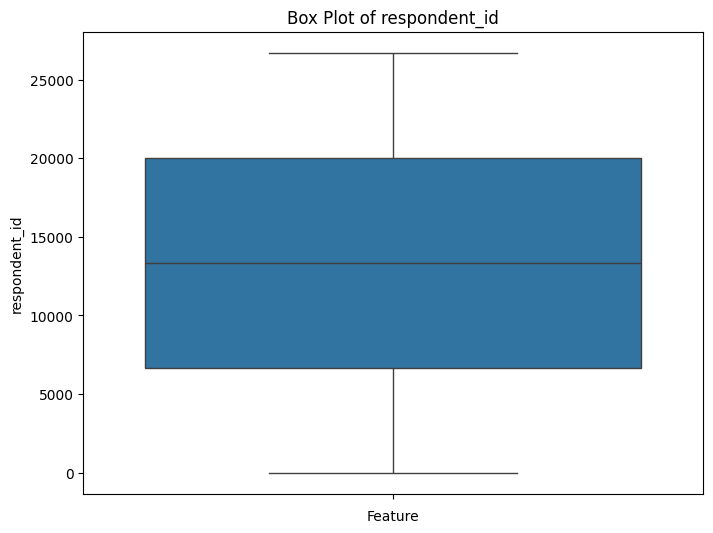

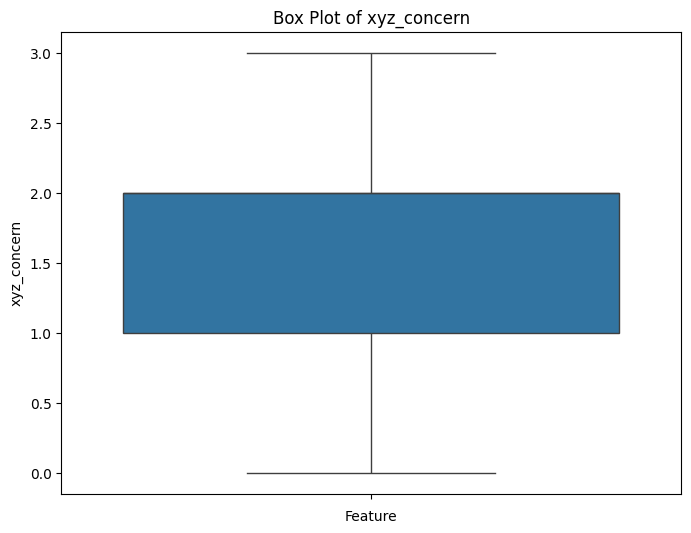

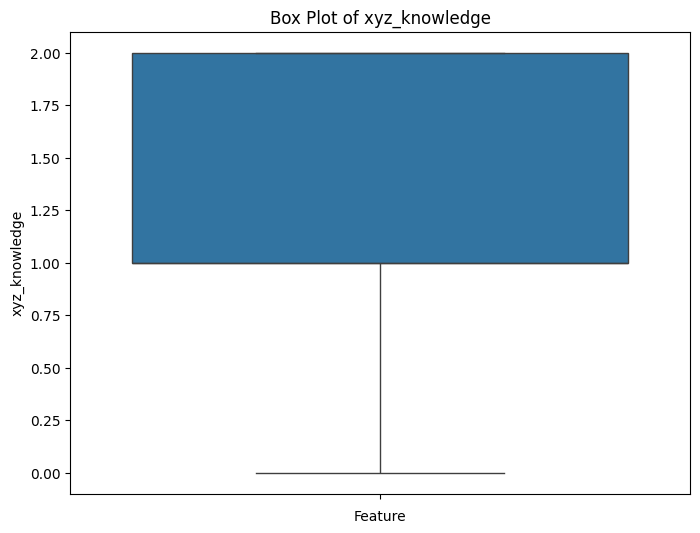

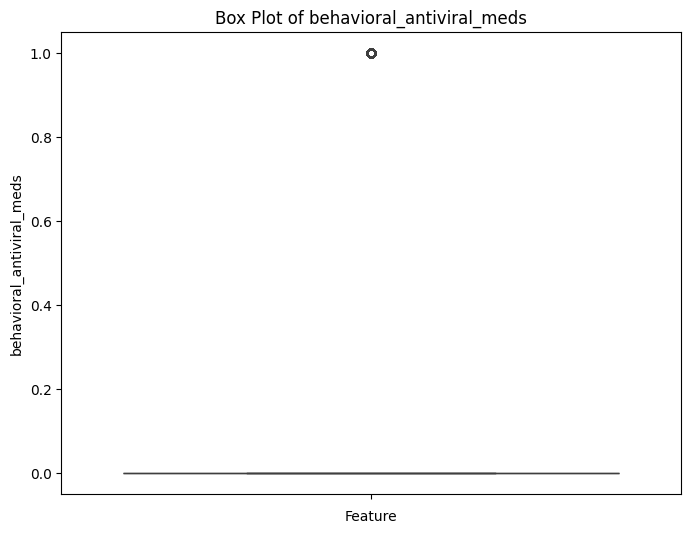

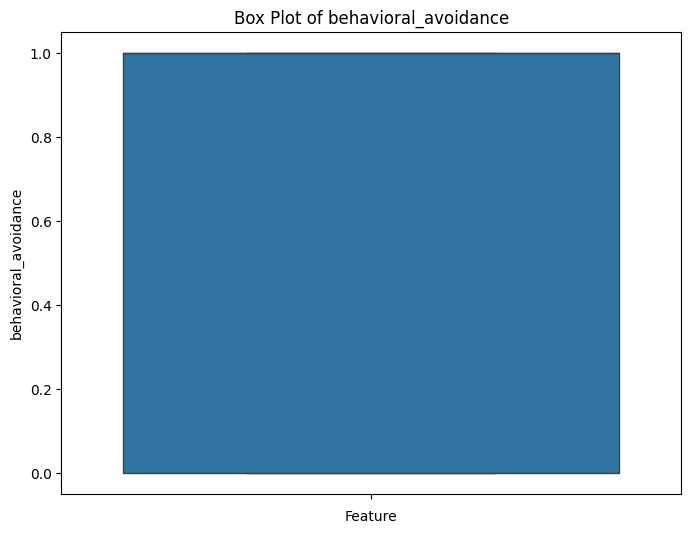

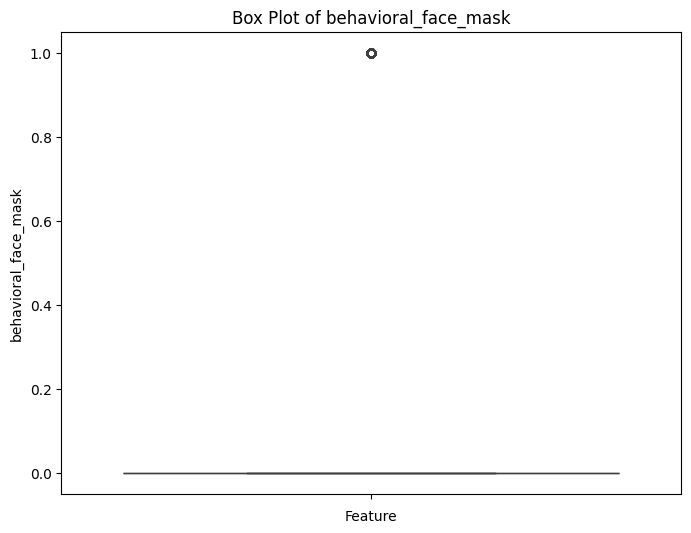

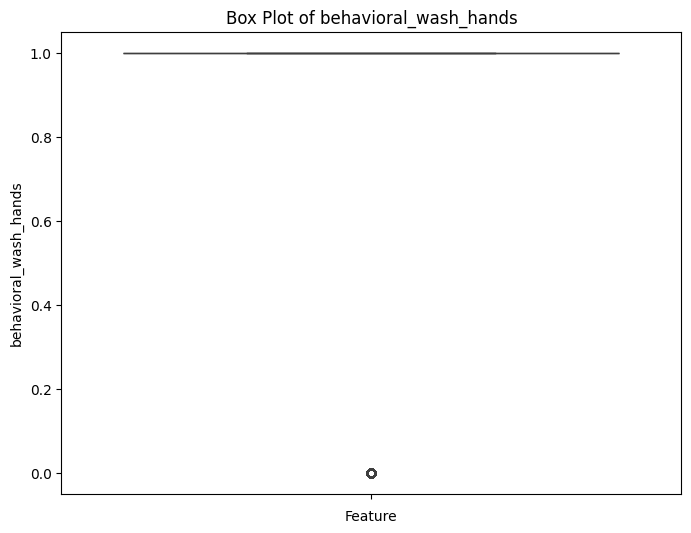

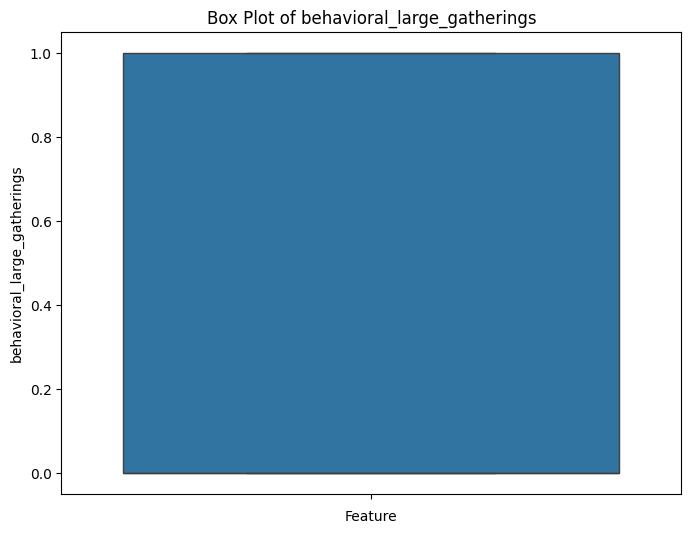

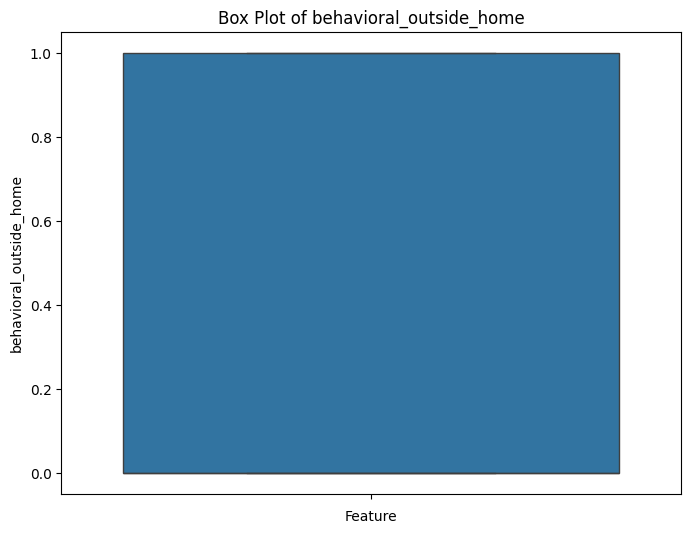

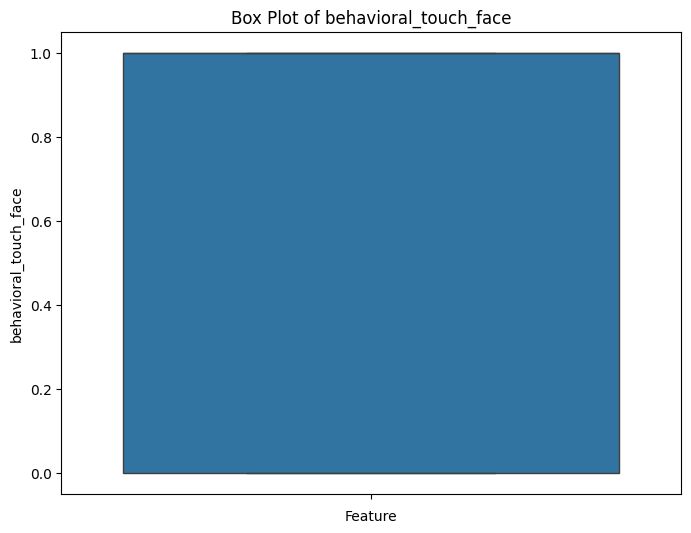

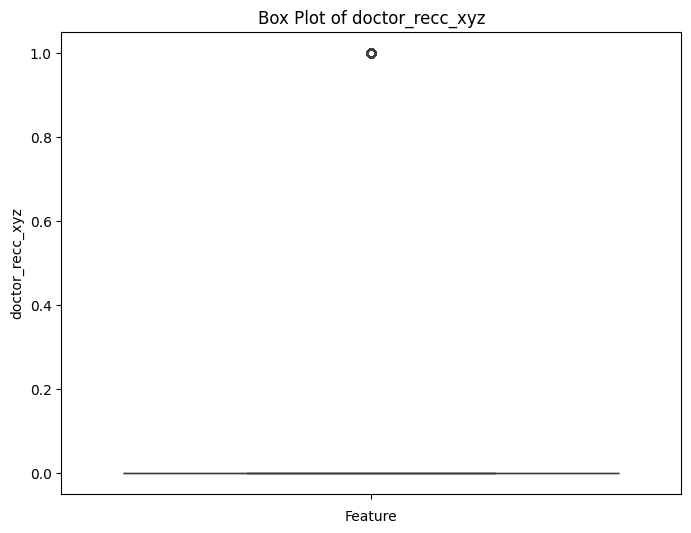

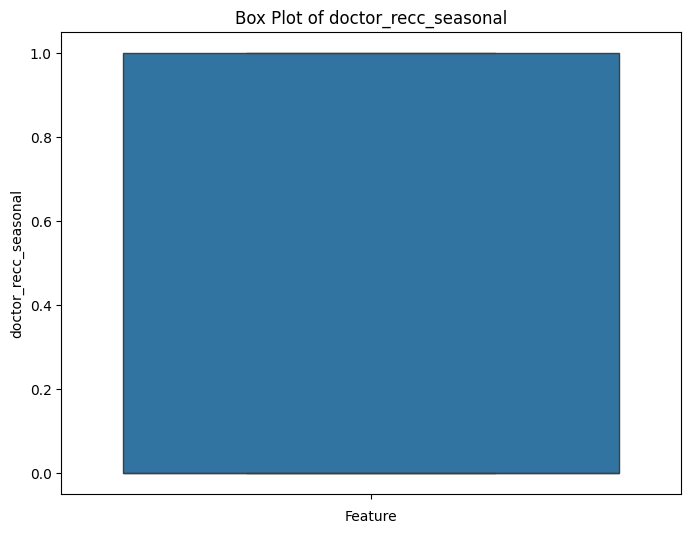

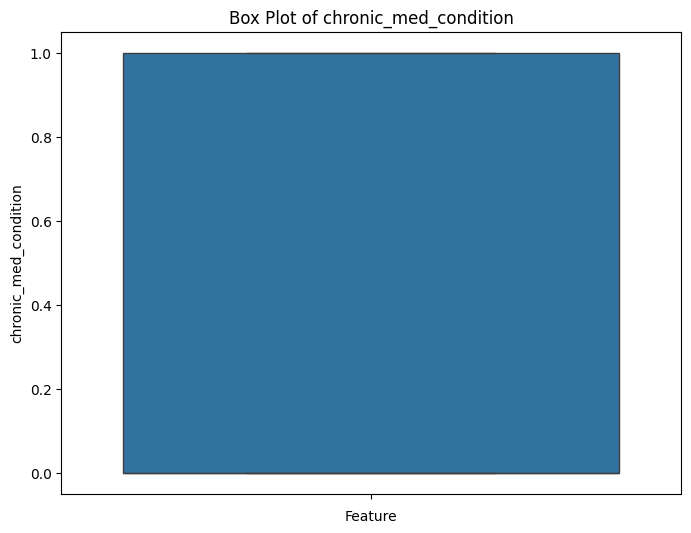

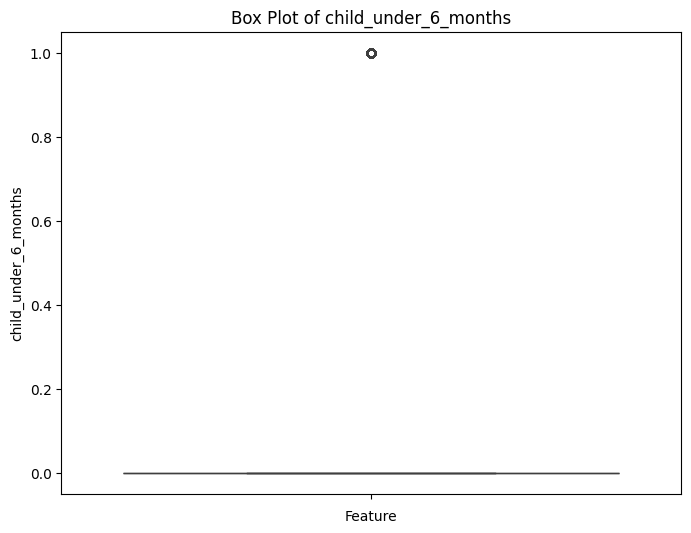

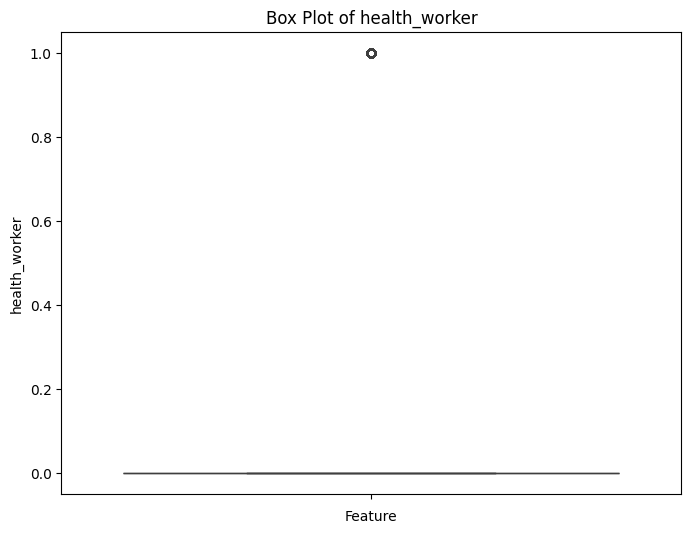

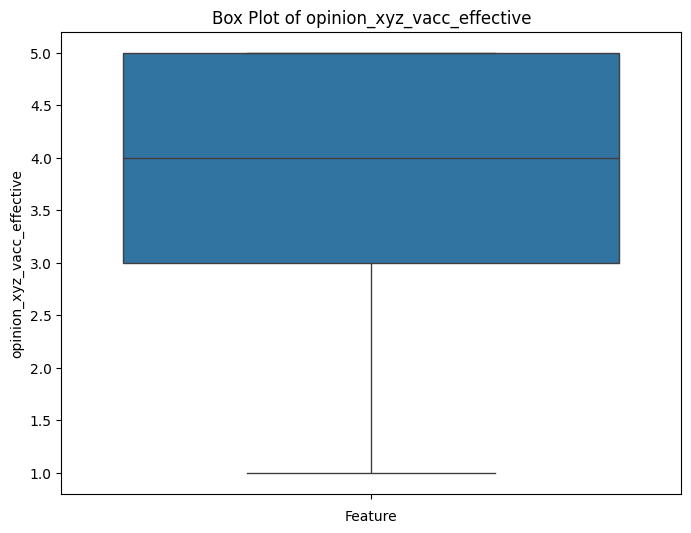

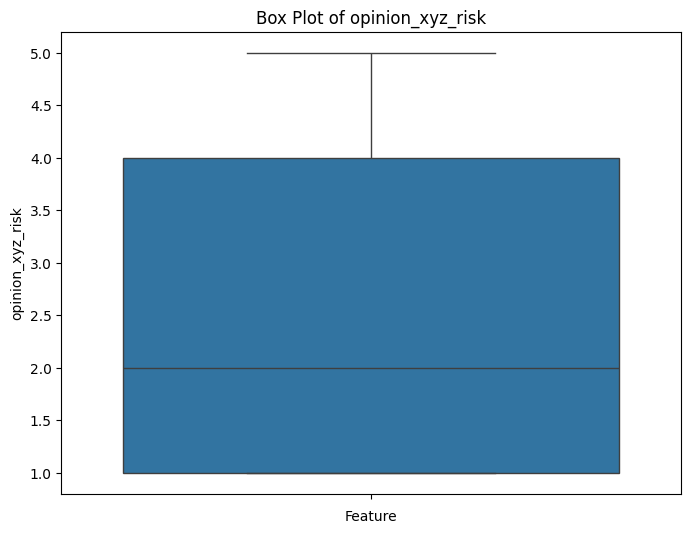

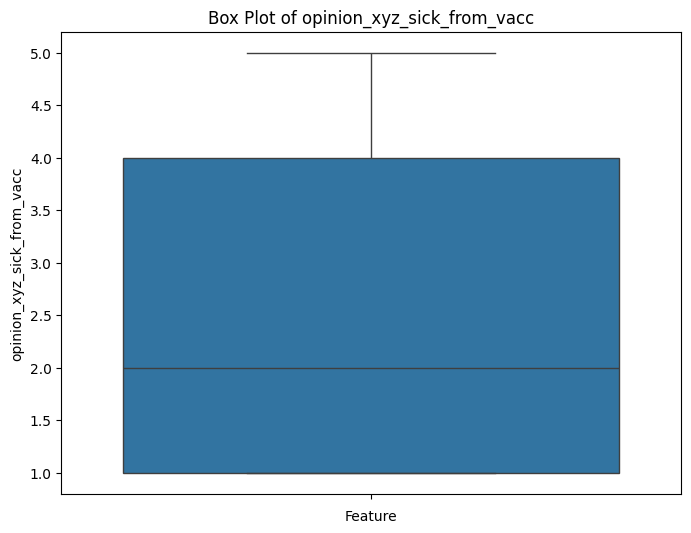

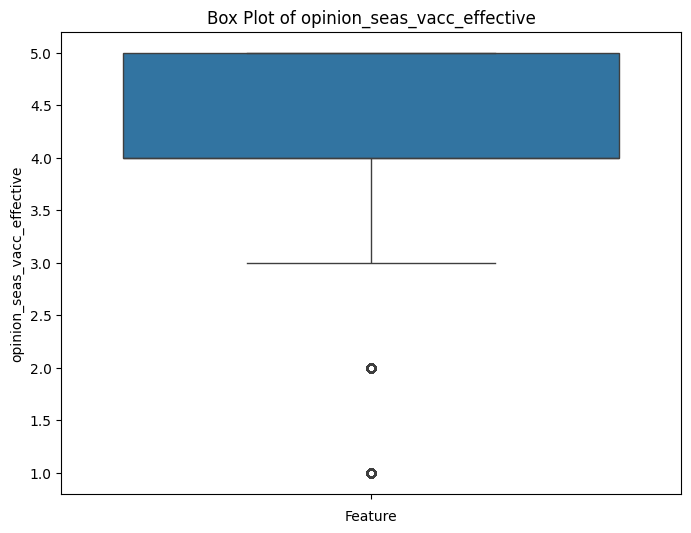

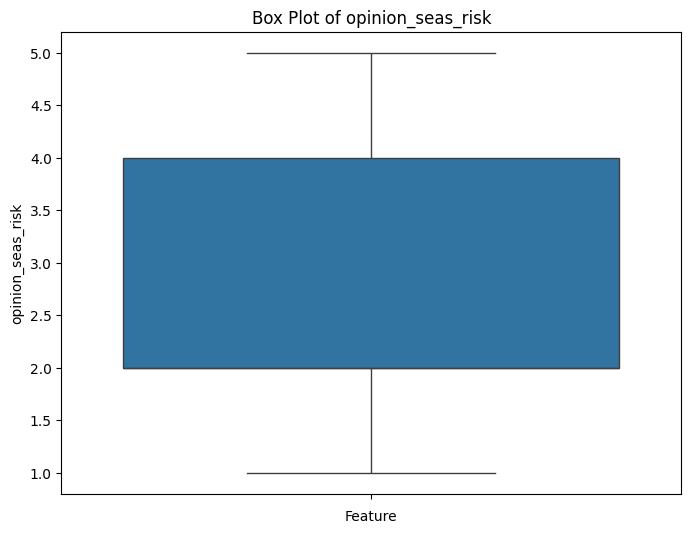

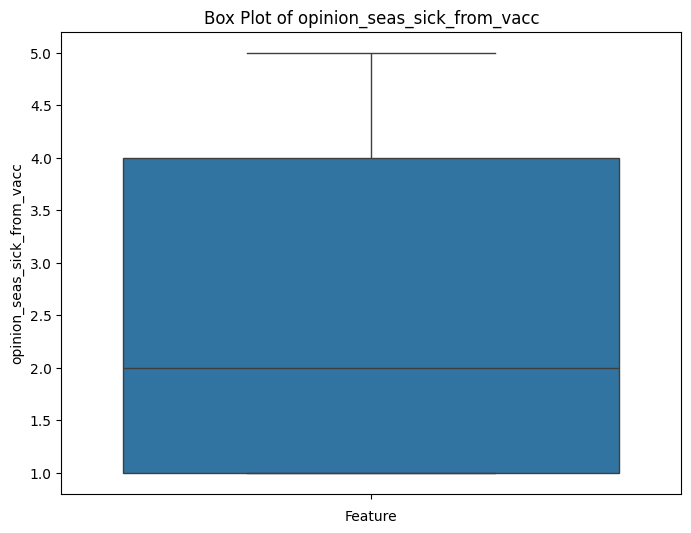

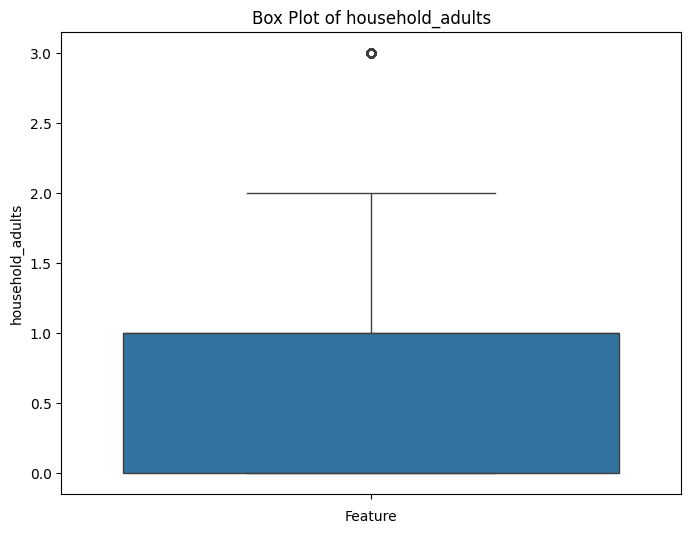

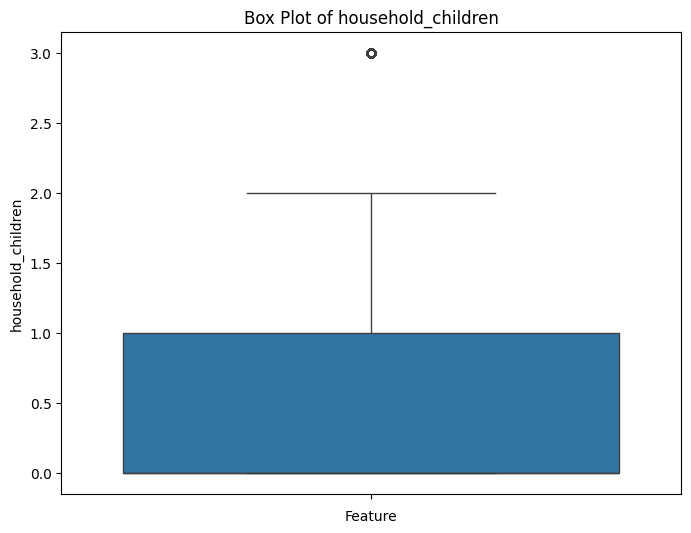

In [101]:
for feature in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=feature, data=df)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('Feature')
    plt.ylabel(feature)
    plt.show()

In [102]:
for col in catcol:
    df[col] = LabelEncoder().fit_transform(df[col])
    final_test[col] = LabelEncoder().fit_transform(final_test[col])

In [103]:
print_unique_values(df)

Unique values in respondent_id: [    0     1     2 ... 26704 26705 26706]
Unique values in xyz_concern: [ 1.  3.  2.  0. nan]
Unique values in xyz_knowledge: [ 0.  2.  1. nan]
Unique values in behavioral_antiviral_meds: [ 0.  1. nan]
Unique values in behavioral_avoidance: [ 0.  1. nan]
Unique values in behavioral_face_mask: [ 0.  1. nan]
Unique values in behavioral_wash_hands: [ 0.  1. nan]
Unique values in behavioral_large_gatherings: [ 0.  1. nan]
Unique values in behavioral_outside_home: [ 1.  0. nan]
Unique values in behavioral_touch_face: [ 1.  0. nan]
Unique values in doctor_recc_xyz: [ 0. nan  1.]
Unique values in doctor_recc_seasonal: [ 0. nan  1.]
Unique values in chronic_med_condition: [ 0.  1. nan]
Unique values in child_under_6_months: [ 0.  1. nan]
Unique values in health_worker: [ 0.  1. nan]
Unique values in opinion_xyz_vacc_effective: [ 3.  5.  4.  2.  1. nan]
Unique values in opinion_xyz_risk: [ 1.  4.  3.  2.  5. nan]
Unique values in opinion_xyz_sick_from_vacc: [ 2. 

In [104]:
print_unique_values(final_test)

Unique values in respondent_id: [26707 26708 26709 ... 53412 53413 53414]
Unique values in xyz_concern: [ 2.  1.  3.  0. nan]
Unique values in xyz_knowledge: [ 2.  1.  0. nan]
Unique values in behavioral_antiviral_meds: [ 0.  1. nan]
Unique values in behavioral_avoidance: [ 1.  0. nan]
Unique values in behavioral_face_mask: [ 0.  1. nan]
Unique values in behavioral_wash_hands: [ 1.  0. nan]
Unique values in behavioral_large_gatherings: [ 1.  0. nan]
Unique values in behavioral_outside_home: [ 0.  1. nan]
Unique values in behavioral_touch_face: [ 1.  0. nan]
Unique values in doctor_recc_xyz: [ 0.  1. nan]
Unique values in doctor_recc_seasonal: [ 0.  1. nan]
Unique values in chronic_med_condition: [ 0.  1. nan]
Unique values in child_under_6_months: [ 0.  1. nan]
Unique values in health_worker: [ 0.  1. nan]
Unique values in opinion_xyz_vacc_effective: [ 5.  4.  3.  2.  1. nan]
Unique values in opinion_xyz_risk: [ 1.  4.  2. nan  3.  5.]
Unique values in opinion_xyz_sick_from_vacc: [ 1. 

In [105]:
print_unique_values(df)

Unique values in respondent_id: [    0     1     2 ... 26704 26705 26706]
Unique values in xyz_concern: [ 1.  3.  2.  0. nan]
Unique values in xyz_knowledge: [ 0.  2.  1. nan]
Unique values in behavioral_antiviral_meds: [ 0.  1. nan]
Unique values in behavioral_avoidance: [ 0.  1. nan]
Unique values in behavioral_face_mask: [ 0.  1. nan]
Unique values in behavioral_wash_hands: [ 0.  1. nan]
Unique values in behavioral_large_gatherings: [ 0.  1. nan]
Unique values in behavioral_outside_home: [ 1.  0. nan]
Unique values in behavioral_touch_face: [ 1.  0. nan]
Unique values in doctor_recc_xyz: [ 0. nan  1.]
Unique values in doctor_recc_seasonal: [ 0. nan  1.]
Unique values in chronic_med_condition: [ 0.  1. nan]
Unique values in child_under_6_months: [ 0.  1. nan]
Unique values in health_worker: [ 0.  1. nan]
Unique values in opinion_xyz_vacc_effective: [ 3.  5.  4.  2.  1. nan]
Unique values in opinion_xyz_risk: [ 1.  4.  3.  2.  5. nan]
Unique values in opinion_xyz_sick_from_vacc: [ 2. 

In [106]:
(df.isnull().sum(axis=0)/len(df))*100

respondent_id                  0.000000
xyz_concern                    0.344479
xyz_knowledge                  0.434343
behavioral_antiviral_meds      0.265848
behavioral_avoidance           0.778822
behavioral_face_mask           0.071142
behavioral_wash_hands          0.157262
behavioral_large_gatherings    0.325757
behavioral_outside_home        0.307036
behavioral_touch_face          0.479275
doctor_recc_xyz                8.087767
doctor_recc_seasonal           8.087767
chronic_med_condition          3.635751
child_under_6_months           3.070356
health_worker                  3.010447
opinion_xyz_vacc_effective     1.464036
opinion_xyz_risk               1.452803
opinion_xyz_sick_from_vacc     1.479013
opinion_seas_vacc_effective    1.729884
opinion_seas_risk              1.924589
opinion_seas_sick_from_vacc    2.010709
age_group                      0.000000
education                      0.000000
race                           0.000000
sex                            0.000000


<Axes: >

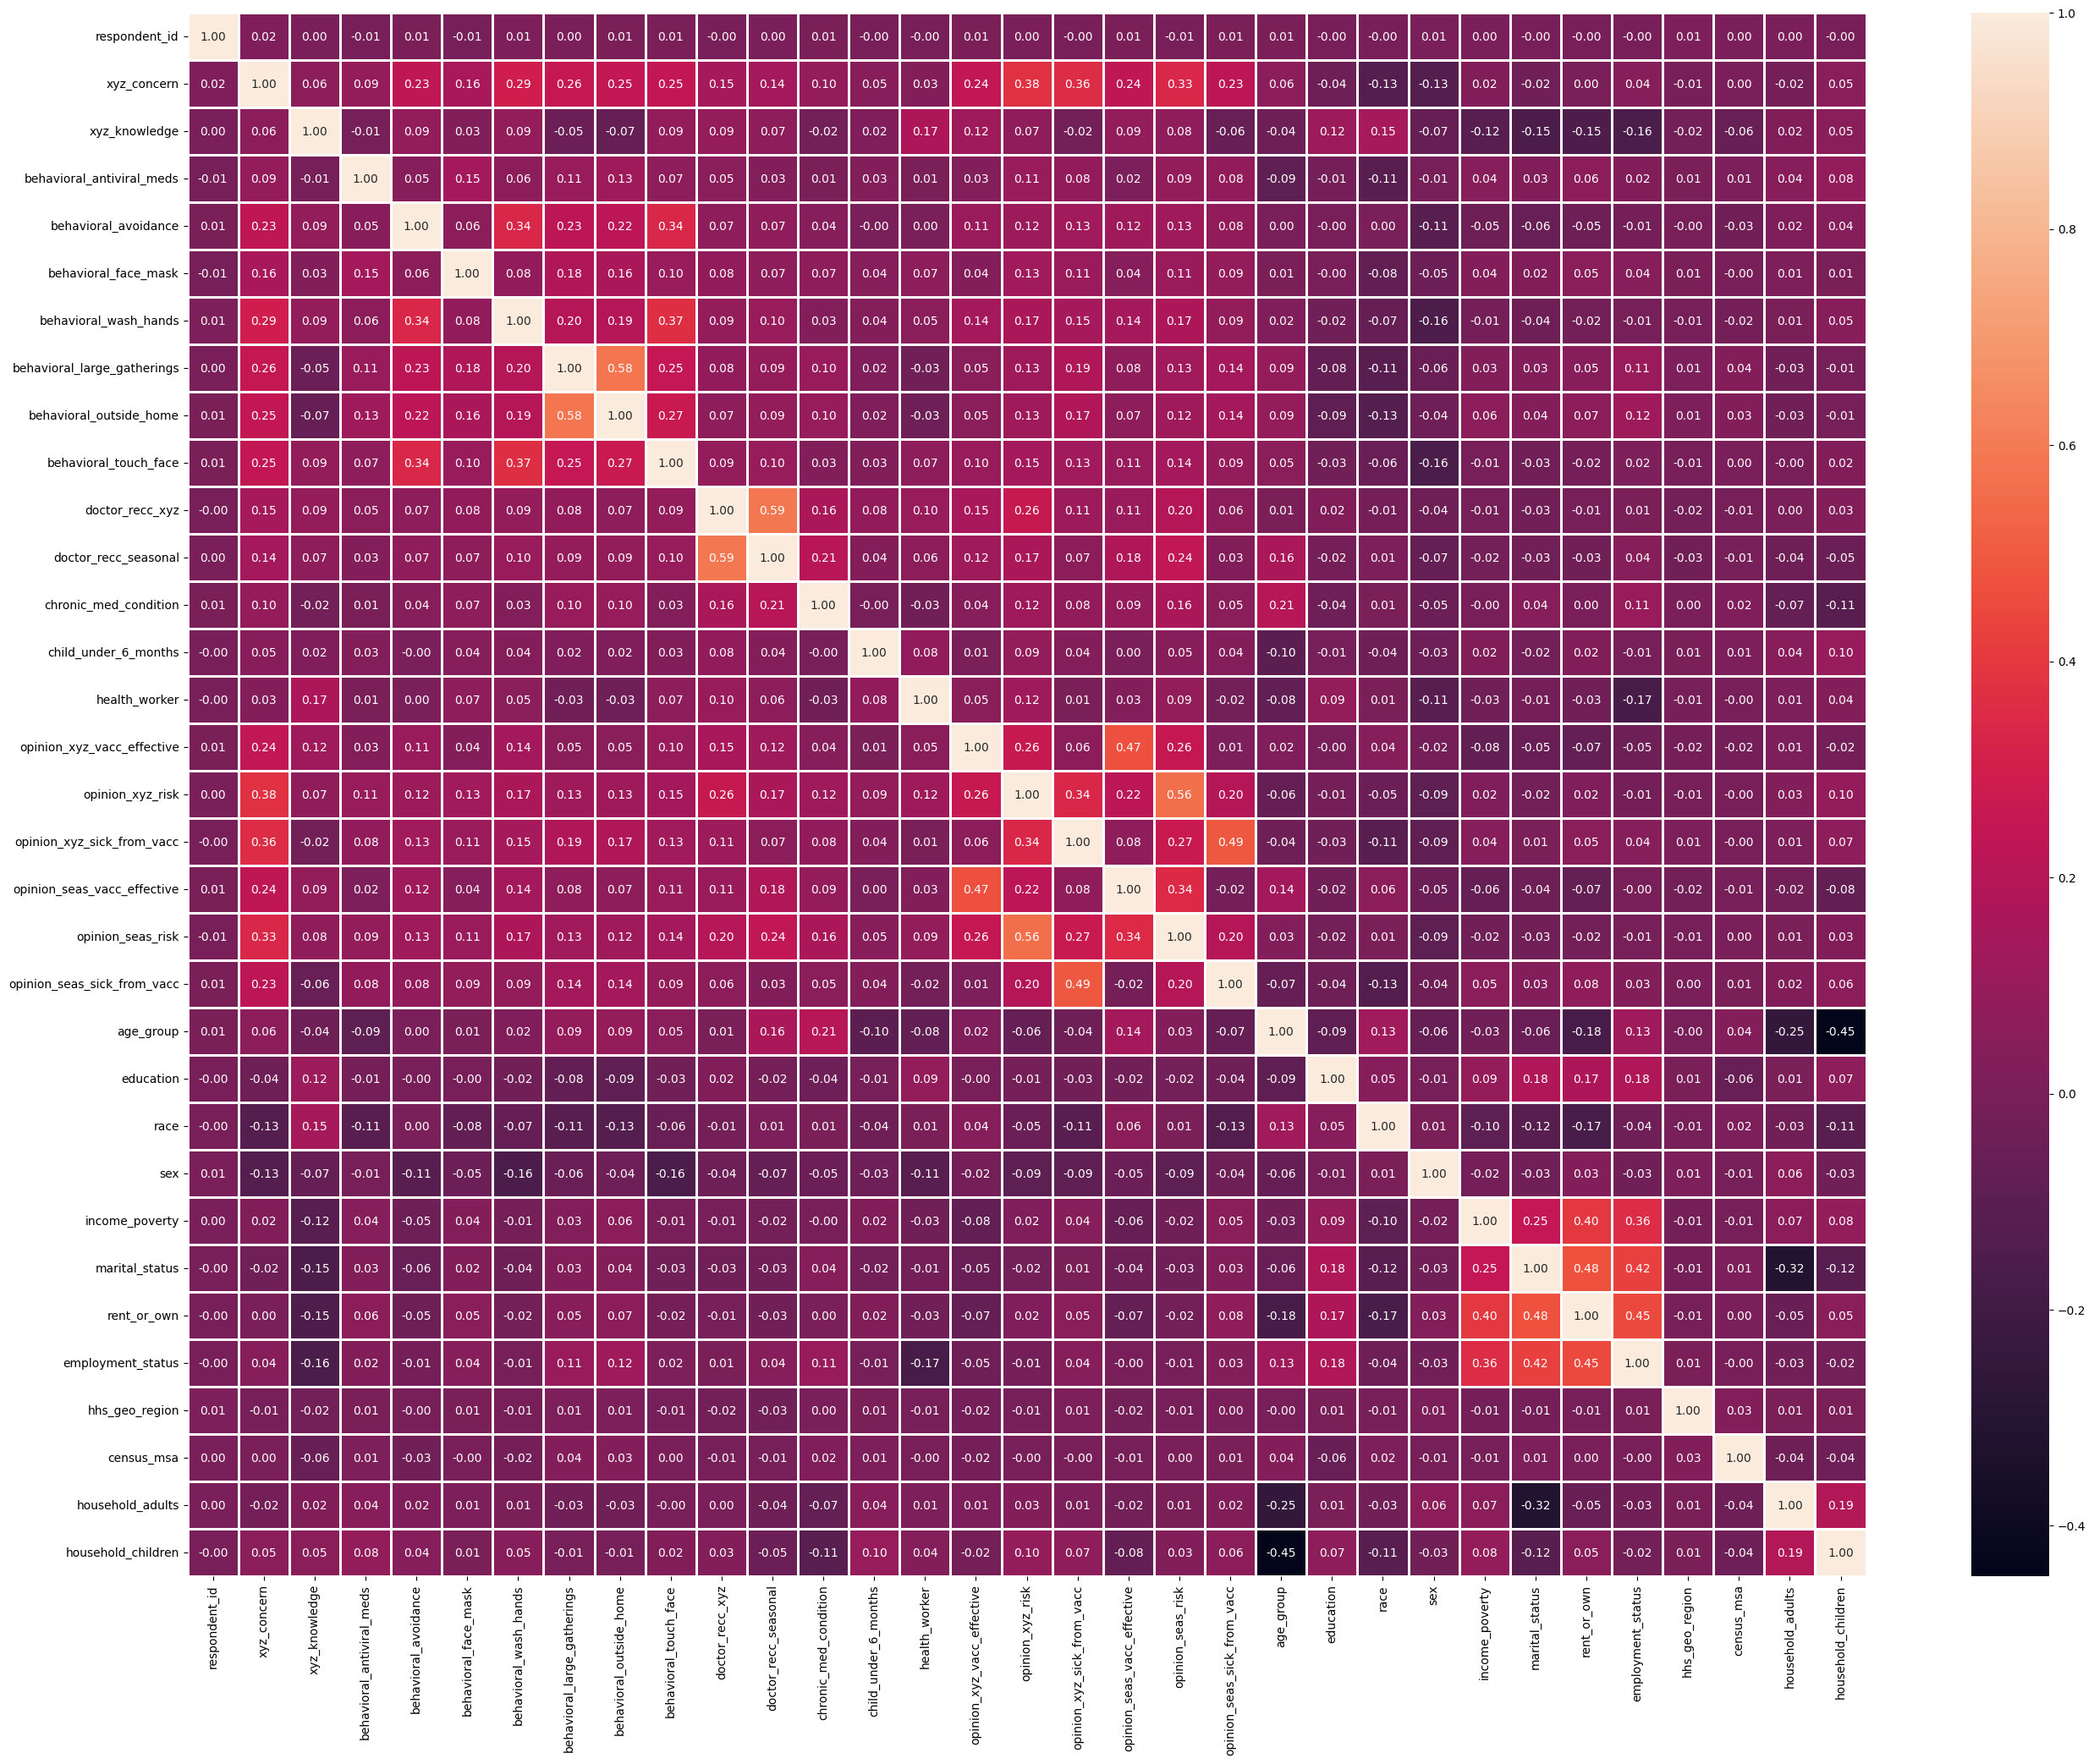

In [107]:
plt.figure(figsize = (32, 24))
sns.heatmap(df.corr(), annot = True, fmt = '.2f',linewidths = 0.8)

In [108]:
# Correlated column removal > 0.5

df = df.drop(columns=['opinion_seas_risk','behavioral_large_gatherings','doctor_recc_xyz','opinion_seas_sick_from_vacc','opinion_seas_vacc_effective'], axis=1)

In [109]:
final_test = final_test.drop(columns=['opinion_seas_risk','behavioral_large_gatherings','doctor_recc_xyz','opinion_seas_sick_from_vacc','opinion_seas_vacc_effective'], axis=1)

In [26]:
df.shape

(26707, 56)

In [110]:
def replace_null_with_median(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Replace null values with median
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)

    return df

In [111]:
df = replace_null_with_median(df)

In [112]:
final_test = replace_null_with_median(final_test)

In [113]:
print_unique_values(df)

Unique values in respondent_id: [    0     1     2 ... 26704 26705 26706]
Unique values in xyz_concern: [1. 3. 2. 0.]
Unique values in xyz_knowledge: [0. 2. 1.]
Unique values in behavioral_antiviral_meds: [0. 1.]
Unique values in behavioral_avoidance: [0. 1.]
Unique values in behavioral_face_mask: [0. 1.]
Unique values in behavioral_wash_hands: [0. 1.]
Unique values in behavioral_outside_home: [1. 0.]
Unique values in behavioral_touch_face: [1. 0.]
Unique values in doctor_recc_seasonal: [0. 1.]
Unique values in chronic_med_condition: [0. 1.]
Unique values in child_under_6_months: [0. 1.]
Unique values in health_worker: [0. 1.]
Unique values in opinion_xyz_vacc_effective: [3. 5. 4. 2. 1.]
Unique values in opinion_xyz_risk: [1. 4. 3. 2. 5.]
Unique values in opinion_xyz_sick_from_vacc: [2. 4. 1. 5. 3.]
Unique values in age_group: [3 1 0 4 2]
Unique values in education: [1 0 2 3 4]
Unique values in race: [3 0 2 1]
Unique values in sex: [0 1]
Unique values in income_poverty: [2 0 1 3]
Uniqu

In [114]:
(df.isnull().sum(axis=0)/len(df))*100

respondent_id                 0.0
xyz_concern                   0.0
xyz_knowledge                 0.0
behavioral_antiviral_meds     0.0
behavioral_avoidance          0.0
behavioral_face_mask          0.0
behavioral_wash_hands         0.0
behavioral_outside_home       0.0
behavioral_touch_face         0.0
doctor_recc_seasonal          0.0
chronic_med_condition         0.0
child_under_6_months          0.0
health_worker                 0.0
opinion_xyz_vacc_effective    0.0
opinion_xyz_risk              0.0
opinion_xyz_sick_from_vacc    0.0
age_group                     0.0
education                     0.0
race                          0.0
sex                           0.0
income_poverty                0.0
marital_status                0.0
rent_or_own                   0.0
employment_status             0.0
hhs_geo_region                0.0
census_msa                    0.0
household_adults              0.0
household_children            0.0
dtype: float64

In [115]:
dfn = df

In [116]:
dfn.shape

(26707, 28)

In [117]:
lb.shape

(26707, 3)

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [119]:
dft = lb['xyz_vaccine']

In [120]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dfn, dft, test_size=0.3, random_state=42)


In [121]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [122]:
# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

y_prob = rf_model.predict_proba(X_test)

In [123]:
y_prob

array([[0.69, 0.31],
       [0.76, 0.24],
       [0.65, 0.35],
       ...,
       [0.9 , 0.1 ],
       [0.88, 0.12],
       [0.68, 0.32]])

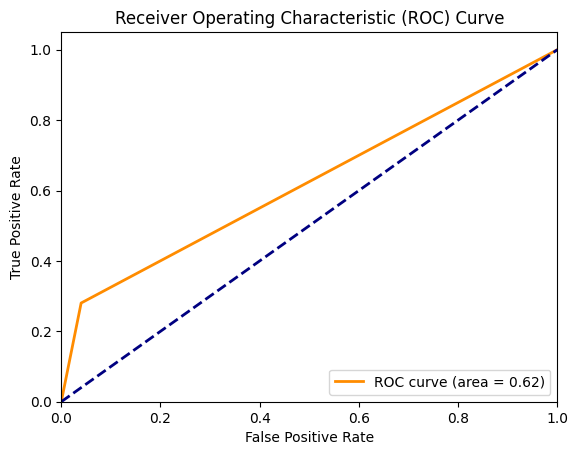

Accuracy: 0.816298514913266
Confusion Matrix:
[[6066  253]
 [1219  475]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6319
           1       0.65      0.28      0.39      1694

    accuracy                           0.82      8013
   macro avg       0.74      0.62      0.64      8013
weighted avg       0.79      0.82      0.79      8013

Probability predictions:
[[0.69 0.31]
 [0.76 0.24]
 [0.65 0.35]
 ...
 [0.9  0.1 ]
 [0.88 0.12]
 [0.68 0.32]]


In [124]:
# Calculate ROC curve and AUC for each output
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Print probability predictions for the test set
print('Probability predictions:')
print(y_prob)

In [125]:
dft2 = lb['seasonal_vaccine']

In [126]:
# Split the dataset into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(dfn, dft2, test_size=0.3, random_state=42)

In [127]:
# Initialize the Random Forest classifier
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [128]:
# Train the model
rf_model1.fit(X_train1, y_train1)

# Predict on the test set
y_pred1 = rf_model1.predict(X_test1)

y_prob1 = rf_model1.predict_proba(X_test1)

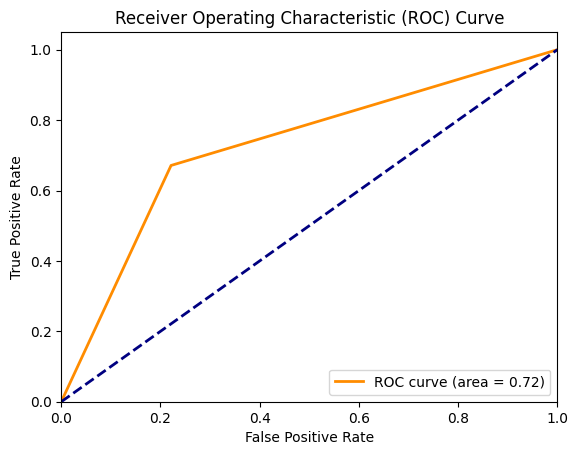

Accuracy: 0.7294396605516037
Confusion Matrix:
[[3381  961]
 [1207 2464]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      4342
           1       0.72      0.67      0.69      3671

    accuracy                           0.73      8013
   macro avg       0.73      0.72      0.73      8013
weighted avg       0.73      0.73      0.73      8013

Probability predictions:
[[0.77 0.23]
 [0.87 0.13]
 [0.38 0.62]
 ...
 [0.82 0.18]
 [0.76 0.24]
 [0.33 0.67]]


In [129]:
# Calculate ROC curve and AUC for each output
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test1, y_pred1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred1)
conf_matrix = confusion_matrix(y_test1, y_pred1)
class_report = classification_report(y_test1, y_pred1)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Print probability predictions for the test set
print('Probability predictions:')
print(y_prob1)

In [130]:
pip install catboost lightgbm

In [131]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

In [132]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMClassifier(n_estimators=100, random_state=42),
    'CatBoost': CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
}

Random Forest:
Accuracy: 0.816298514913266
Confusion Matrix:
[[6066  253]
 [1219  475]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6319
           1       0.65      0.28      0.39      1694

    accuracy                           0.82      8013
   macro avg       0.74      0.62      0.64      8013
weighted avg       0.79      0.82      0.79      8013

---


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM:
Accuracy: 0.7885935355048047
Confusion Matrix:
[[6319    0]
 [1694    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6319
           1       0.00      0.00      0.00      1694

    accuracy                           0.79      8013
   macro avg       0.39      0.50      0.44      8013
weighted avg       0.62      0.79      0.70      8013

---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.7892175215275178
Confusion Matrix:
[[6058  261]
 [1428  266]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      6319
           1       0.50      0.16      0.24      1694

    accuracy                           0.79      8013
   macro avg       0.66      0.56      0.56      8013
weighted avg       0.74      0.79      0.74      8013

---
Gradient Boosting:
Accuracy: 0.8191688506177461
Confusion Matrix:
[[6042  277]
 [1172  522]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6319
           1       0.65      0.31      0.42      1694

    accuracy                           0.82      8013
   macro avg       0.75      0.63      0.66      8013
weighted avg       0.80      0.82      0.79      8013

---
[LightGBM] [Info] Number of positive: 3980, number of negative: 14714
[LightGBM] [Info] Auto-choosing ro

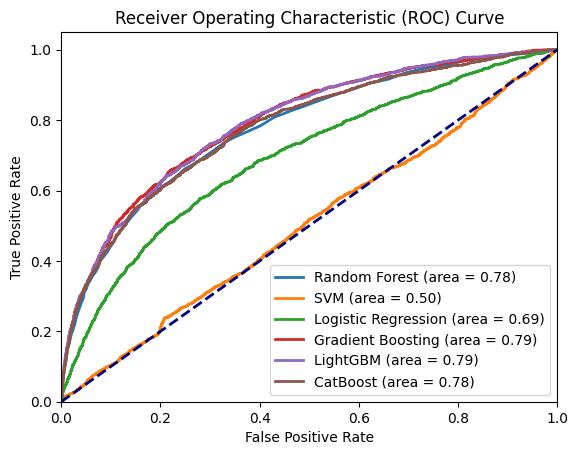

Probability predictions for Random Forest:
[0.31 0.24 0.35 ... 0.1  0.12 0.32]
---
Probability predictions for SVM:
[0.21791254 0.20869204 0.22000529 ... 0.20267173 0.22572852 0.21646135]
---
Probability predictions for Logistic Regression:
[0.09049049 0.05573375 0.23590724 ... 0.06678689 0.14180907 0.10670319]
---
Probability predictions for Gradient Boosting:
[0.15392949 0.1161363  0.15901179 ... 0.04359166 0.04958846 0.25653359]
---
Probability predictions for LightGBM:
[0.19400391 0.14989123 0.13299348 ... 0.03582008 0.04872264 0.2704476 ]
---
Probability predictions for CatBoost:
[0.23399792 0.19812253 0.09729757 ... 0.02993803 0.01795171 0.27730092]
---


In [133]:
# Dictionary to store predictions and probabilities
y_preds = {}
y_probs = {}
roc_aucs = {}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_preds[model_name] = model.predict(X_test)

    # Predict probabilities for the ROC AUC curve
    y_probs[model_name] = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs[model_name])
    roc_auc = auc(fpr, tpr)
    roc_aucs[model_name] = roc_auc

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_preds[model_name])
    conf_matrix = confusion_matrix(y_test, y_preds[model_name])
    class_report = classification_report(y_test, y_preds[model_name])

    # Print evaluation metrics
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)
    print('---')

# Plot the ROC curve for all models
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print probability predictions for the test set for each model
for model_name in models.keys():
    print(f'Probability predictions for {model_name}:')
    print(y_probs[model_name])
    print('---')

Random Forest:
Accuracy: 0.7294396605516037
Confusion Matrix:
[[3381  961]
 [1207 2464]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      4342
           1       0.72      0.67      0.69      3671

    accuracy                           0.73      8013
   macro avg       0.73      0.72      0.73      8013
weighted avg       0.73      0.73      0.73      8013

---


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM:
Accuracy: 0.5418694621240484
Confusion Matrix:
[[4342    0]
 [3671    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      4342
           1       0.00      0.00      0.00      3671

    accuracy                           0.54      8013
   macro avg       0.27      0.50      0.35      8013
weighted avg       0.29      0.54      0.38      8013

---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.6898789467115937
Confusion Matrix:
[[3086 1256]
 [1229 2442]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      4342
           1       0.66      0.67      0.66      3671

    accuracy                           0.69      8013
   macro avg       0.69      0.69      0.69      8013
weighted avg       0.69      0.69      0.69      8013

---
Gradient Boosting:
Accuracy: 0.7402970173468114
Confusion Matrix:
[[3392  950]
 [1131 2540]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      4342
           1       0.73      0.69      0.71      3671

    accuracy                           0.74      8013
   macro avg       0.74      0.74      0.74      8013
weighted avg       0.74      0.74      0.74      8013

---
[LightGBM] [Info] Number of positive: 8764, number of negative: 9930
[LightGBM] [Info] Auto-choosing row

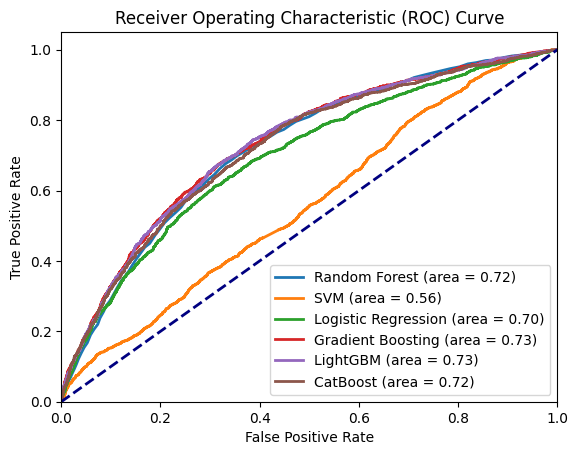

Probability predictions for Random Forest:
[0.23 0.13 0.62 ... 0.18 0.24 0.67]
---
Probability predictions for SVM:
[0.62082112 0.33377191 0.66240371 ... 0.31210401 0.410439   0.44899084]
---
Probability predictions for Logistic Regression:
[0.20379156 0.21359735 0.53875311 ... 0.13260571 0.55531295 0.51635819]
---
Probability predictions for Gradient Boosting:
[0.19231569 0.19030657 0.68255947 ... 0.10372526 0.17984359 0.6174906 ]
---
Probability predictions for LightGBM:
[0.15564285 0.19733354 0.78655882 ... 0.22568445 0.12586179 0.59661512]
---
Probability predictions for CatBoost:
[0.30973498 0.23156984 0.71430814 ... 0.08986013 0.10071046 0.66568676]
---


In [134]:
# Dictionary to store predictions and probabilities
y_preds = {}
y_probs = {}
roc_aucs = {}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train1, y_train1)

    # Predict on the test set
    y_preds[model_name] = model.predict(X_test1)

    # Predict probabilities for the ROC AUC curve
    y_probs[model_name] = model.predict_proba(X_test1)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs[model_name])
    roc_auc = auc(fpr, tpr)
    roc_aucs[model_name] = roc_auc

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')

    # Evaluate the model
    accuracy = accuracy_score(y_test1, y_preds[model_name])
    conf_matrix = confusion_matrix(y_test1, y_preds[model_name])
    class_report = classification_report(y_test1, y_preds[model_name])

    # Print evaluation metrics
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)
    print('---')

# Plot the ROC curve for all models
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print probability predictions for the test set for each model
for model_name in models.keys():
    print(f'Probability predictions for {model_name}:')
    print(y_probs[model_name])
    print('---')

In [135]:
final_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [136]:
final_model.fit(dfn,dft)

GradientBoostingClassifier(random_state=42)

In [137]:
y_prob_1 = {}

In [138]:
y_prob_1 = final_model.predict_proba(final_test)[:, 1]

In [139]:
y_prob_1

array([0.11254175, 0.04239956, 0.38613549, ..., 0.07513755, 0.0390293 ,
       0.07363715])

In [140]:
final_model1 = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [141]:
final_model1.fit(dfn,dft2)

GradientBoostingClassifier(random_state=42)

In [142]:
y_prob_2 = {}

In [143]:
y_prob_2 = final_model1.predict_proba(final_test)[:, 1]

In [144]:
y_prob_2.shape

(26708,)

In [145]:
result = pd.DataFrame()

In [146]:
result['respondent_id'] = final_test['respondent_id']

In [147]:
result['h1n1_vaccine'] = y_prob_1

In [148]:
result['seasonal_vaccine'] = y_prob_2

In [149]:
result.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.112542,0.265601
1,26708,0.042400,0.060199
2,26709,0.386135,0.760716
3,26710,0.244988,0.669909
4,26711,0.156266,0.349403


In [151]:
csv_file_path = '/content/drive/MyDrive/SA-Hack1/Result.csv'

In [152]:
result.to_csv(csv_file_path, index=False)

In [153]:
def create_download_link(file_path):
    return FileLink(file_path)

In [154]:
from google.colab import files

# Download the file
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>